In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from scipy import stats

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
## Importing Datasets
train_data =  pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')

In [4]:
train_data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
print(train_data.shape)
print(test_data.shape)

(8523, 12)
(5681, 11)


In [7]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [8]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
test_data.isnull().sum()


Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
train_data['source'] = 'train'
test_data['source'] = 'test'
df = pd.concat([train_data,test_data], ignore_index=True)

In [11]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

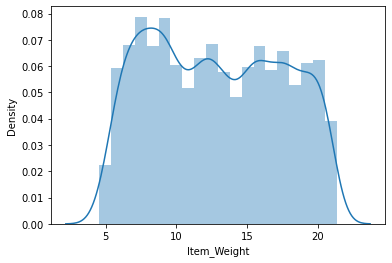

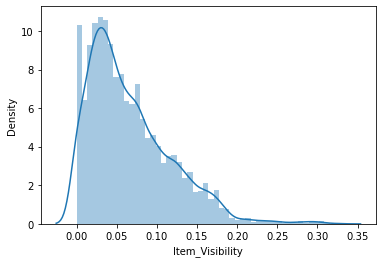

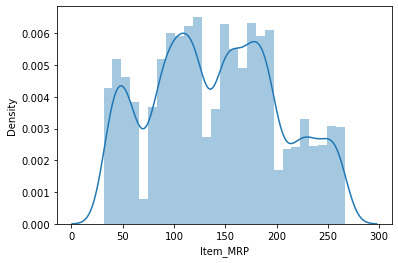

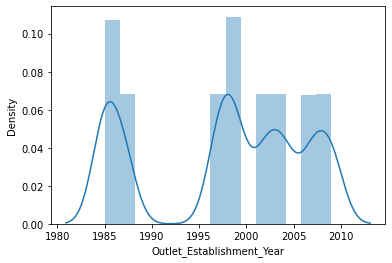

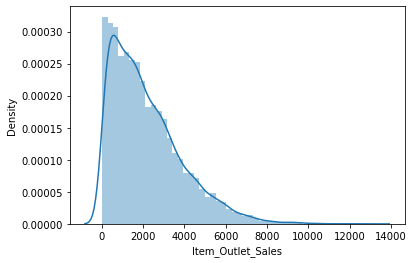

In [12]:
for i in train_data.describe().columns:
    sns.distplot(train_data[i].dropna())
    plt.show()

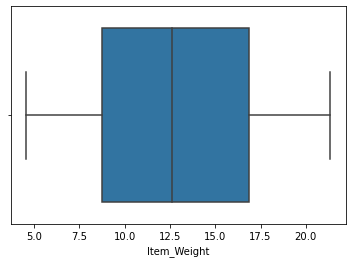

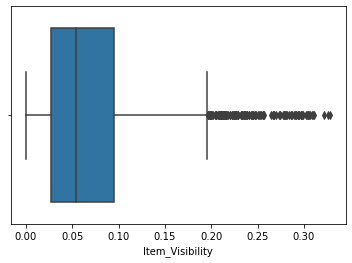

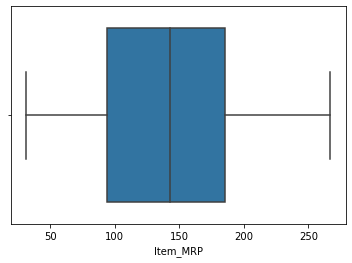

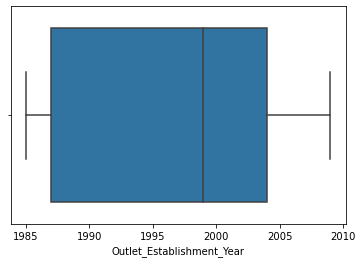

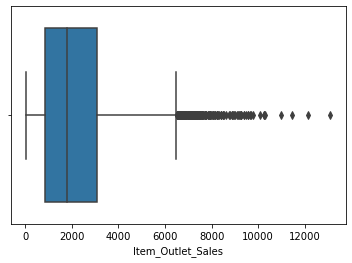

In [13]:
for i in train_data.describe().columns:
    sns.boxplot(train_data[i].dropna())
    plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

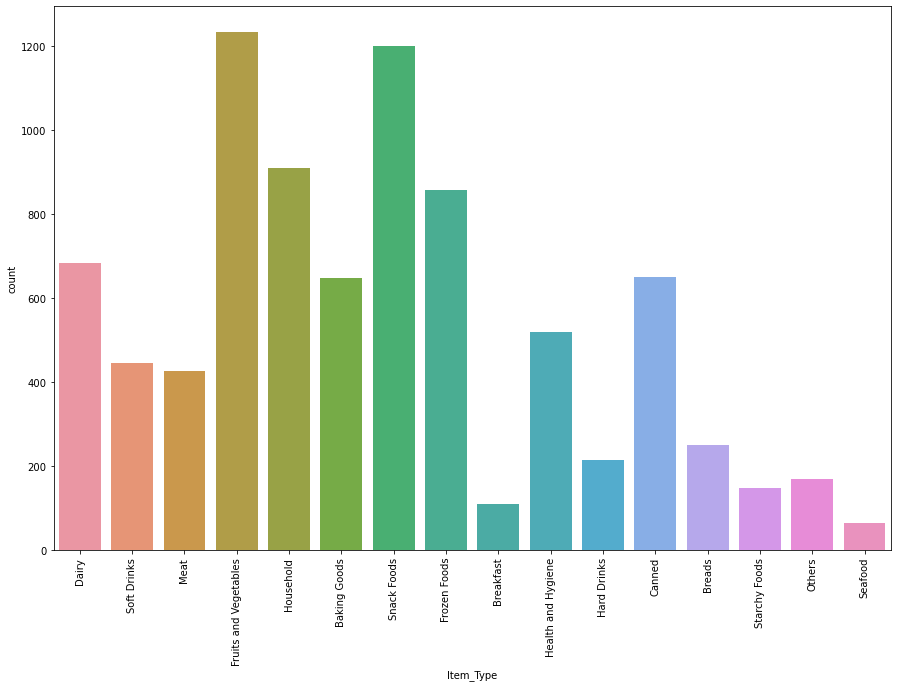

In [14]:
plt.figure(figsize=(15,10))
sns.countplot(train_data.Item_Type)
plt.xticks(rotation=90)

In [15]:
train_data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

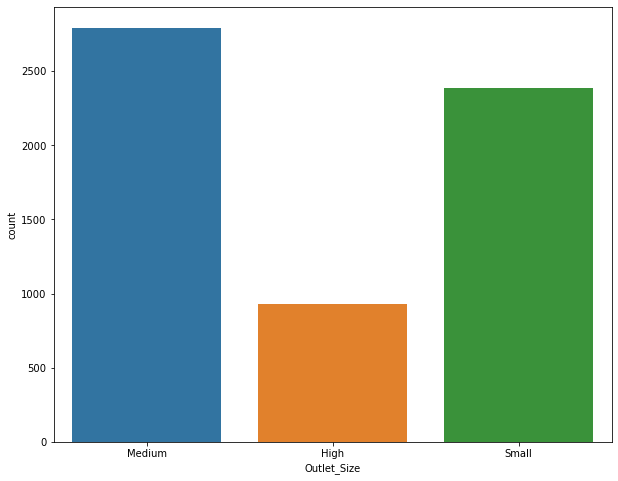

In [16]:
#Distribution of the Outlet_Size
plt.figure(figsize=(10,8))
sns.countplot(train_data.Outlet_Size)
plt.show()

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

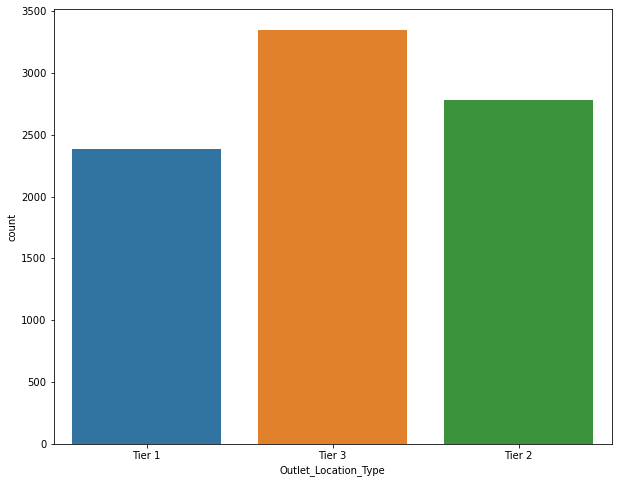

In [17]:
#Distribution of the Outlet_Location_Type
plt.figure(figsize=(10,8))
sns.countplot(train_data.Outlet_Location_Type)

In [18]:
train_data.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

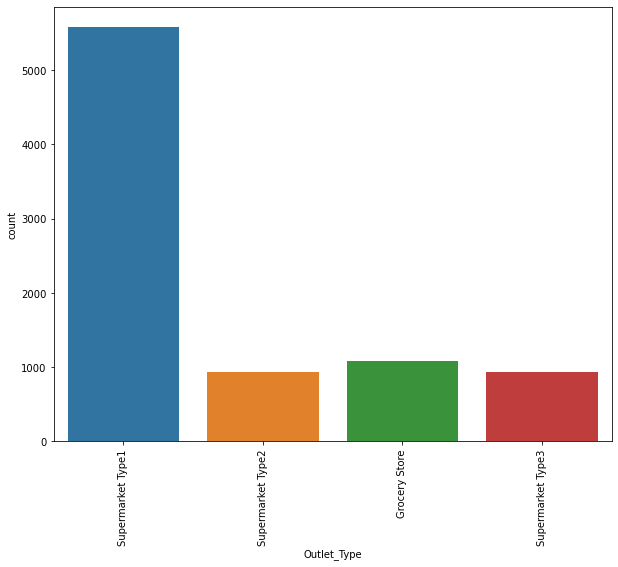

In [19]:
#Distribution of the Outlet_Type
plt.figure(figsize=(10,8))
sns.countplot(train_data.Outlet_Type)
plt.xticks(rotation=90)

In [20]:
train_data.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<AxesSubplot:title={'center':'Itam Weight and Item Outlet Sales'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

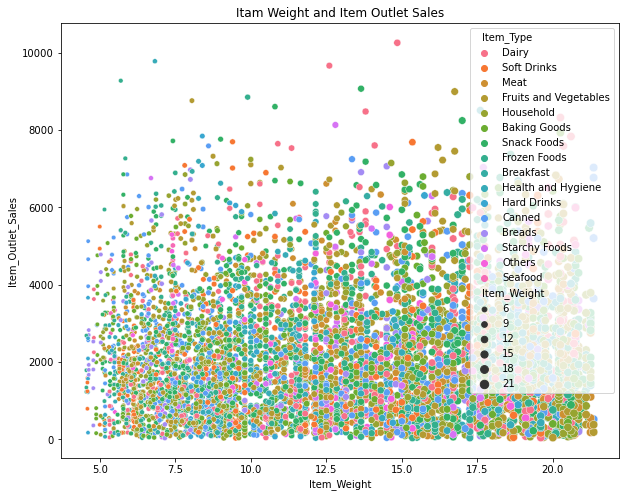

In [21]:

plt.figure(figsize=(10,8))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Itam Weight and Item Outlet Sales")
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', hue='Item_Type',size='Item_Weight',data=train_data)

<AxesSubplot:title={'center':'Item Visibility and Item Outlet Sales'}, xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

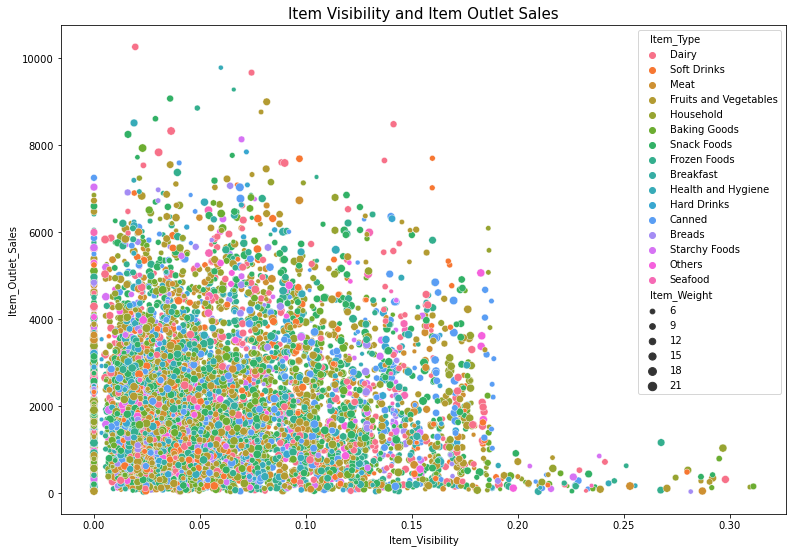

In [22]:
plt.figure(figsize=(13,9))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item Visibility and Item Outlet Sales",fontsize=15)
sns.scatterplot(x="Item_Visibility", y="Item_Outlet_Sales", hue="Item_Type", size= 'Item_Weight',data=train_data)

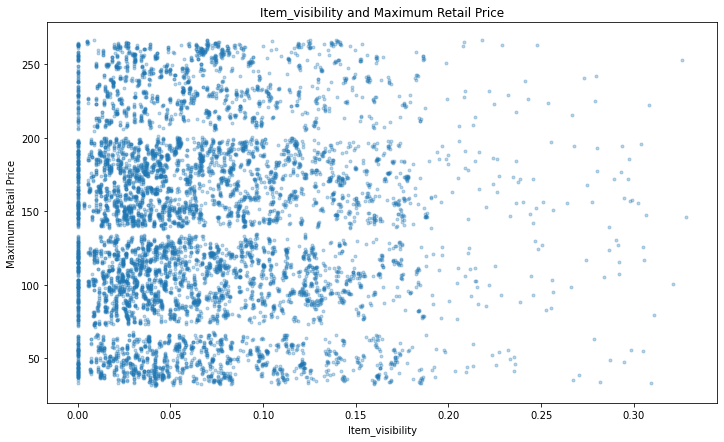

In [23]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_visibility")
plt.ylabel("Maximum Retail Price")
plt.title("Item_visibility and Maximum Retail Price")
plt.plot(train_data.Item_Visibility, train_data.Item_MRP, ".", alpha=0.3)

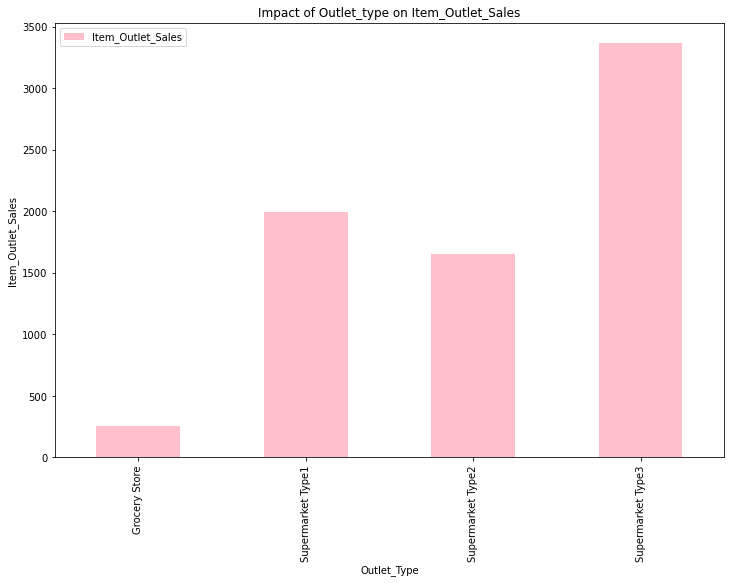

In [24]:
Outlet_Type_pivot = train_data.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales', aggfunc=np.median)

Outlet_Type_pivot.plot(kind='bar', color='pink', figsize=(12,8))
plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_type on Item_Outlet_Sales")
plt.show()

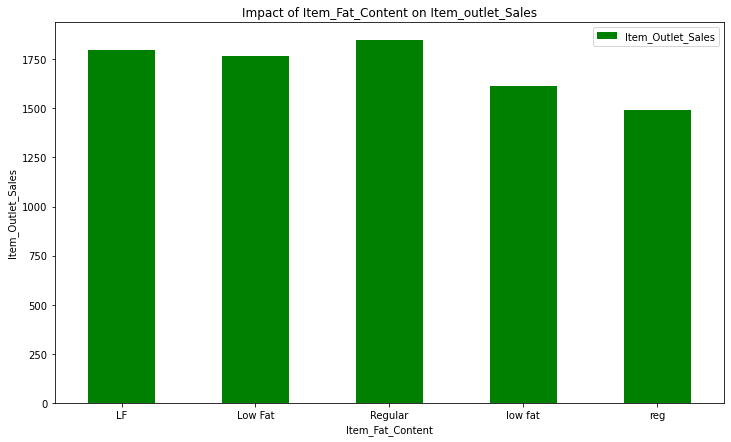

In [25]:
Item_Fat_Content_pivot = train_data.pivot_table(index='Item_Fat_Content', values='Item_Outlet_Sales', aggfunc=np.median)

Item_Fat_Content_pivot.plot(kind='bar',color='green', figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [26]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [27]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [28]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [29]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

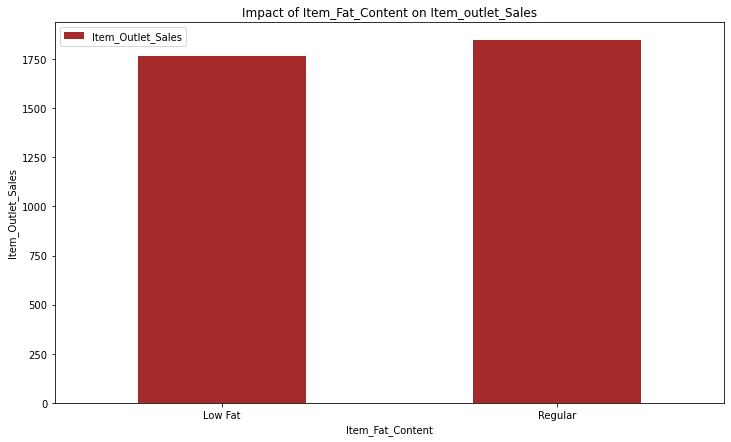

In [30]:
Item_Fat_Content_pivot = train_data.pivot_table(index='Item_Fat_Content', values='Item_Outlet_Sales', aggfunc=np.median)

Item_Fat_Content_pivot.plot(kind='bar',color='brown', figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [31]:
train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


Text(0.5, 1.0, 'Correlation between different attributes')

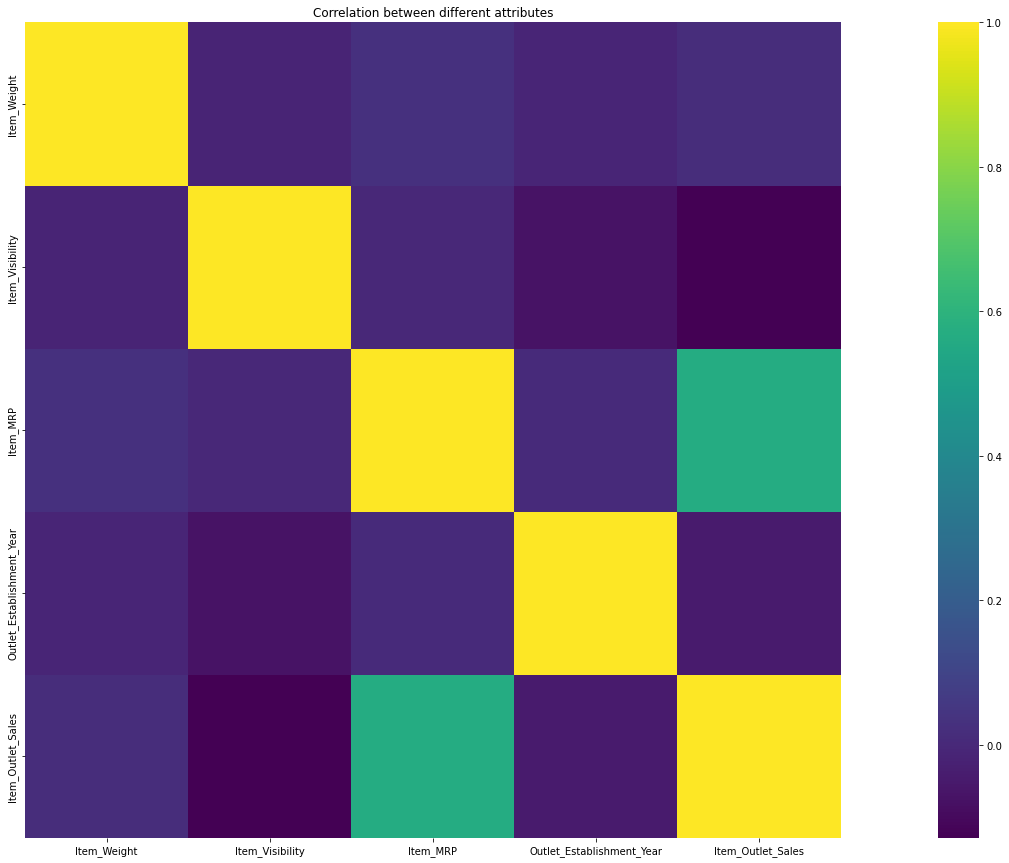

In [32]:
plt.figure(figsize=(35,15))
sns.heatmap(train_data.corr(), vmax=1,square=True, cmap='viridis')
plt.title("Correlation between different attributes")

In [33]:
#Treating the missing values¶
#Item_Weight-mean of the column
 
df['Item_Weight'].mean()

12.792854228644991

In [34]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [35]:
#Replacing the NaN values in the Outlet_Size column with Medium 
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [36]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [37]:
df['Outlet_Size'].fillna("Medium", inplace=True)


In [38]:
df.isnull().sum()    ## now we dont have any null values

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [39]:
print(train_data.shape)
print(df.shape)

(8523, 13)
(14204, 13)


In [40]:
#Item_Visibility
df[df['Item_Visibility']==0]['Item_Visibility'].count()

879

In [41]:
df['Item_Visibility'].fillna(df['Item_Visibility'].median(), inplace=True)  

In [42]:
#Outlet Years
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [43]:
df['Outlet_Years'] = 2009 - df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

In [44]:
#Item Type
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [45]:
#These items are either Food, Drinks, or Non-Consumable
df['Item_Identifier'].value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [46]:
##Changing only the first 2 characters (i,e the category ID)
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[0:2])

In [47]:
## Rename them to more intuitive categories::
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food','NC':'Non_Consumable','DR':'Drinks'})

df['New_Item_Type'].value_counts()

Food              10201
Non_Consumable     2686
Drinks             1317
Name: New_Item_Type, dtype: int64

In [48]:
#If a product is non-consumable then why associate a fat-content to that? we will get rid of this
## Mark non-consumable as separate category in Low-fat.

df.loc[df['New_Item_Type']=="Non_Consumable","Item_Fat_Content"] = "Non-Edible"
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [49]:
item_visib_avg = df.pivot_table(values='Item_Visibility', index='Item_Identifier')

In [50]:
item_visib_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [51]:
#if a product more visible, then it's likely it eill be getting higher sales.
function = lambda x: x['Item_Visibility']/item_visib_avg['Item_Visibility'][item_visib_avg.index==x['Item_Identifier']][0]

df['item_visib_avg'] = df.apply(function, axis=1).astype(float)

In [52]:
item_visib_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [53]:
#LabelEncoder function
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

df['Outlet'] = label.fit_transform(df['Outlet_Identifier'])
varib = ['Item_Fat_Content','Outlet_Location_Type', 'Outlet_Size','New_Item_Type','Outlet_Type','Outlet']

for i in varib:
    df[i] = label.fit_transform(df[i])

In [69]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_Years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,10,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,10,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,11,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,train,22,...,0,1,0,0,0,0,0,0,0,0


In [70]:
df.drop(['Item_Type','Outlet_Establishment_Year'], axis=1, inplace=True)
train_data = df.loc[df['source']=='train']
test_data = df.loc[df['source']=='test']
train_data.drop(['source'], axis=1,inplace=True)
test_data.drop(['Item_Outlet_Sales','source'], axis=1,inplace=True)

In [71]:
X_train = train_data.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1).copy()
y_train = train_data['Item_Outlet_Sales']
X_test = test_data.drop(['Item_Identifier','Outlet_Identifier'], axis=1).copy()

In [73]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)

lr.fit(X_train , y_train)

LinearRegression(normalize=True)

In [74]:
lr_pred = lr.predict(X_test)

In [75]:
lr_pred

array([1832., 1568., 1872., ..., 1792., 3584., 1232.])

In [76]:
lr_accuracy = round(lr.score(X_train,y_train) * 100)
lr_accuracy

56

In [78]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

tree.fit(X_train,y_train)

tree_pred = tree.predict(X_test)
tree_pred

array([1649.67954808, 1412.15620504,  584.75776477, ..., 1827.83284545,
       3692.81910244, 1211.249992  ])

In [79]:
tree_accuracy = round(tree.score(X_train, y_train)*100)
tree_accuracy


62

In [81]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=400, max_depth=6, min_samples_leaf = 100,n_jobs=4)

rf.fit(X_train,y_train)

rf_pred = rf.predict(X_test)

rf_accuracy = round(rf.score(X_train,y_train) * 100)
rf_accuracy

61

In [82]:
#XGBoost Regressor
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=1000, learning_rate = 0.05)
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [83]:
pred = model.predict(X_test)
pred

array([1466.5479, 1350.2109,  630.7106, ..., 2057.4688, 4970.335 ,
       1451.6243], dtype=float32)

In [84]:
model.score(X_train,y_train)*100

88.38978930816562